In [24]:
# Install the unstable development version in Jupyter notebook:

#!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

# https://github.com/AI4Finance-Foundation/FinRL/blob/master/examples/FinRL_PortfolioOptimizationEnv_Demo.ipynb

# import packages
import torch

import numpy as np

from sklearn.preprocessing import MaxAbsScaler

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import GroupByScaler
from finrl.meta.env_portfolio_optimization.env_portfolio_optimization import PortfolioOptimizationEnv
from finrl.agents.portfolio_optimization.models import DRLAgent
from finrl.agents.portfolio_optimization.architectures import EIIE


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'



In [25]:
TOP_BRL = [
    "VALE3.SA", "PETR4.SA", "ITUB4.SA", "BBDC4.SA",
    "BBAS3.SA", "RENT3.SA", "LREN3.SA", "PRIO3.SA",
    "WEGE3.SA", "ABEV3.SA"
]


print(len(TOP_BRL))

portfolio_raw_df = YahooDownloader(start_date = '2011-01-01',
                                end_date = '2022-12-31',
                                ticker_list = TOP_BRL).fetch_data()
portfolio_raw_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

10



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (29780, 8)


,date,open,high,low,close,volume,tic,day
0,2011-01-03,8.632311,8.728203,8.630313,5.226993,576145,ABEV3.SA,0
1,2011-01-03,15.750000,15.900000,15.690000,6.245201,6626800,BBAS3.SA,0
2,2011-01-03,11.809763,11.927362,11.724237,6.369363,10862336,BBDC4.SA,0
3,2011-01-03,18.031555,18.250118,17.963253,10.273070,10014663,ITUB4.SA,0
4,2011-01-03,8.422694,8.629907,8.422694,6.115660,3652542,LREN3.SA,0
...,...,...,...,...,...,...,...,...
29775,2022-12-29,24.990000,25.049999,24.430000,16.668444,57901800,PETR4.SA,3
29776,2022-12-29,37.250000,37.480000,36.619999,37.150330,7890300,PRIO3.SA,3
29777,2022-12-29,54.300869,55.776001,52.626392,50.361671,8786791,RENT3.SA,3
29778,2022-12-29,89.000000,89.949997,88.830002,77.194092,40110800,VALE3.SA,3


In [26]:
portfolio_raw_df.groupby("tic").count()

,date,open,high,low,close,volume,day
tic,,,,,,,
ABEV3.SA,2978,2978,2978,2978,2978,2978,2978
BBAS3.SA,2978,2978,2978,2978,2978,2978,2978
BBDC4.SA,2978,2978,2978,2978,2978,2978,2978
ITUB4.SA,2978,2978,2978,2978,2978,2978,2978
LREN3.SA,2978,2978,2978,2978,2978,2978,2978
PETR4.SA,2978,2978,2978,2978,2978,2978,2978
PRIO3.SA,2978,2978,2978,2978,2978,2978,2978
RENT3.SA,2978,2978,2978,2978,2978,2978,2978
VALE3.SA,2978,2978,2978,2978,2978,2978,2978


In [27]:
portfolio_norm_df = GroupByScaler(by="tic", scaler=MaxAbsScaler).fit_transform(portfolio_raw_df)
portfolio_norm_df

c:\Users\bencj\Desktop\Econ4\Thesis\.venv\lib\site-packages\finrl\meta\preprocessor\preprocessors.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.00200262 0.00114137 0.0010422  ... 0.04565734 0.05214546 0.07760399]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[select_mask, self.columns] = self.scalers[value].transform(
c:\Users\bencj\Desktop\Econ4\Thesis\.venv\lib\site-packages\finrl\meta\preprocessor\preprocessors.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.   0.25 0.5  ... 0.25 0.5  0.75]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X.loc[select_mask, self.columns] = self.scalers[value].transform(


,date,open,high,low,close,volume,tic,day
0,2011-01-03,0.353928,0.355383,0.359147,0.270062,0.002003,ABEV3.SA,0.00
1,2011-01-03,0.566547,0.568771,0.572419,0.320274,0.014581,BBAS3.SA,0.00
2,2011-01-03,0.396939,0.397479,0.399922,0.284434,0.021760,BBDC4.SA,0.00
3,2011-01-03,0.466293,0.458661,0.467793,0.328571,0.062331,ITUB4.SA,0.00
4,2011-01-03,0.153498,0.157120,0.155466,0.126038,0.072591,LREN3.SA,0.00
...,...,...,...,...,...,...,...,...
29775,2022-12-29,0.663745,0.652514,0.662958,0.694899,0.082841,PETR4.SA,0.75
29776,2022-12-29,0.858295,0.844144,0.878173,0.857373,0.048724,PRIO3.SA,0.75
29777,2022-12-29,0.737949,0.754746,0.727218,0.728877,0.097191,RENT3.SA,0.75
29778,2022-12-29,0.742905,0.746783,0.770759,0.916710,0.218546,VALE3.SA,0.75


In [28]:
df_portfolio = portfolio_norm_df[["date", "tic", "close", "high", "low"]]

df_portfolio_train = df_portfolio[(df_portfolio["date"] >= "2011-01-01") & (df_portfolio["date"] < "2019-12-31")]
df_portfolio_2020 = df_portfolio[(df_portfolio["date"] >= "2020-01-01") & (df_portfolio["date"] < "2020-12-31")]
df_portfolio_2021 = df_portfolio[(df_portfolio["date"] >= "2021-01-01") & (df_portfolio["date"] < "2021-12-31")]
df_portfolio_2022 = df_portfolio[(df_portfolio["date"] >= "2022-01-01") & (df_portfolio["date"] < "2022-12-31")]

In [29]:
environment = PortfolioOptimizationEnv(
        df_portfolio_train,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=50,
        features=["close", "high", "low"],
        normalize_df=None
    )

In [30]:
# set PolicyGradient parameters
model_kwargs = {
    "lr": 0.01,
    "policy": EIIE,
}

# here, we can set EIIE's parameters
policy_kwargs = {
    "k_size": 3,
    "time_window": 50,
}

model = DRLAgent(environment).get_model("pg", device, model_kwargs, policy_kwargs)

In [31]:
DRLAgent.train_model(model, episodes=40)

  0%|          | 0/40 [00:00<?, ?it/s]

Initial portfolio value:100000
Final portfolio value: 380895.28125
Final accumulative portfolio value: 3.8089528125
Maximum DrawDown: -0.45558660909389914
Sharpe ratio: 0.8005127768282801


  2%|▎         | 1/40 [00:25<16:30, 25.40s/it]

Initial portfolio value:100000
Final portfolio value: 633401.3125
Final accumulative portfolio value: 6.334013125
Maximum DrawDown: -0.522226265805124
Sharpe ratio: 0.9693311912223638


  5%|▌         | 2/40 [00:50<15:58, 25.23s/it]

Initial portfolio value:100000
Final portfolio value: 945616.6875
Final accumulative portfolio value: 9.456166875
Maximum DrawDown: -0.7306245625891965
Sharpe ratio: 0.8861093995006208


  8%|▊         | 3/40 [01:15<15:23, 24.96s/it]

Initial portfolio value:100000
Final portfolio value: 1027853.875
Final accumulative portfolio value: 10.27853875
Maximum DrawDown: -0.7766312645287075
Sharpe ratio: 0.852717642302589


 10%|█         | 4/40 [01:50<17:29, 29.15s/it]

Initial portfolio value:100000
Final portfolio value: 941337.3125
Final accumulative portfolio value: 9.413373125
Maximum DrawDown: -0.7468800715254533
Sharpe ratio: 0.8750759649893265


 12%|█▎        | 5/40 [02:18<16:41, 28.61s/it]

Initial portfolio value:100000
Final portfolio value: 1058371.25
Final accumulative portfolio value: 10.5837125
Maximum DrawDown: -0.7719093850776462
Sharpe ratio: 0.8630864788622159


 15%|█▌        | 6/40 [02:47<16:23, 28.91s/it]

Initial portfolio value:100000
Final portfolio value: 1055493.5
Final accumulative portfolio value: 10.554935
Maximum DrawDown: -0.7683999367358675
Sharpe ratio: 0.8693048447808658


 18%|█▊        | 7/40 [03:19<16:23, 29.81s/it]

Initial portfolio value:100000
Final portfolio value: 1084952.125
Final accumulative portfolio value: 10.84952125
Maximum DrawDown: -0.7595557690598622
Sharpe ratio: 0.8840147289820116


 20%|██        | 8/40 [03:52<16:24, 30.77s/it]

Initial portfolio value:100000
Final portfolio value: 1098274.5
Final accumulative portfolio value: 10.982745
Maximum DrawDown: -0.7593133554304825
Sharpe ratio: 0.8862084441309277


 22%|██▎       | 9/40 [04:25<16:14, 31.42s/it]

Initial portfolio value:100000
Final portfolio value: 1107950.625
Final accumulative portfolio value: 11.07950625
Maximum DrawDown: -0.7585496019518827
Sharpe ratio: 0.8886643058270256


 25%|██▌       | 10/40 [04:53<15:13, 30.44s/it]

Initial portfolio value:100000
Final portfolio value: 1116797.25
Final accumulative portfolio value: 11.1679725
Maximum DrawDown: -0.757537941163602
Sharpe ratio: 0.8911182825033623


 28%|██▊       | 11/40 [05:20<14:14, 29.48s/it]

Initial portfolio value:100000
Final portfolio value: 1125115.0
Final accumulative portfolio value: 11.25115
Maximum DrawDown: -0.7566586867763877
Sharpe ratio: 0.8934829619626924


 30%|███       | 12/40 [05:48<13:27, 28.85s/it]

Initial portfolio value:100000
Final portfolio value: 1132836.25
Final accumulative portfolio value: 11.3283625
Maximum DrawDown: -0.7560582976370669
Sharpe ratio: 0.89528253605697


 32%|███▎      | 13/40 [06:15<12:45, 28.36s/it]

Initial portfolio value:100000
Final portfolio value: 1139380.375
Final accumulative portfolio value: 11.39380375
Maximum DrawDown: -0.7555945859271966
Sharpe ratio: 0.8967815452318448


 35%|███▌      | 14/40 [06:45<12:34, 29.02s/it]

Initial portfolio value:100000
Final portfolio value: 1145586.875
Final accumulative portfolio value: 11.45586875
Maximum DrawDown: -0.7551267996831497
Sharpe ratio: 0.89822008490868


 38%|███▊      | 15/40 [07:14<12:05, 29.02s/it]

Initial portfolio value:100000
Final portfolio value: 1151320.5
Final accumulative portfolio value: 11.513205
Maximum DrawDown: -0.7547411683394178
Sharpe ratio: 0.8994833864005576


 40%|████      | 16/40 [07:43<11:31, 28.82s/it]

Initial portfolio value:100000
Final portfolio value: 1156701.25
Final accumulative portfolio value: 11.5670125
Maximum DrawDown: -0.7543840285679185
Sharpe ratio: 0.9006555847682635


 42%|████▎     | 17/40 [08:15<11:22, 29.69s/it]

Initial portfolio value:100000
Final portfolio value: 1161762.375
Final accumulative portfolio value: 11.61762375
Maximum DrawDown: -0.754098156554982
Sharpe ratio: 0.9016869638895197


 45%|████▌     | 18/40 [08:41<10:31, 28.70s/it]

Initial portfolio value:100000
Final portfolio value: 1166486.375
Final accumulative portfolio value: 11.66486375
Maximum DrawDown: -0.7538931923716289
Sharpe ratio: 0.9025673201330785


 48%|████▊     | 19/40 [09:07<09:46, 27.94s/it]

Initial portfolio value:100000
Final portfolio value: 1170940.5
Final accumulative portfolio value: 11.709405
Maximum DrawDown: -0.7537109117461311
Sharpe ratio: 0.9033781143176618


 50%|█████     | 20/40 [09:33<09:07, 27.38s/it]

Initial portfolio value:100000
Final portfolio value: 1175123.25
Final accumulative portfolio value: 11.7512325
Maximum DrawDown: -0.7535550915295576
Sharpe ratio: 0.904113880381113


 52%|█████▎    | 21/40 [10:01<08:42, 27.49s/it]

Initial portfolio value:100000
Final portfolio value: 1179331.0
Final accumulative portfolio value: 11.79331
Maximum DrawDown: -0.7533833805328096
Sharpe ratio: 0.9048607781014507


 55%|█████▌    | 22/40 [10:29<08:19, 27.76s/it]

Initial portfolio value:100000
Final portfolio value: 1183393.875
Final accumulative portfolio value: 11.83393875
Maximum DrawDown: -0.7532951041195748
Sharpe ratio: 0.9054742357690232


 57%|█████▊    | 23/40 [10:56<07:44, 27.30s/it]

Initial portfolio value:100000
Final portfolio value: 1185453.25
Final accumulative portfolio value: 11.8545325
Maximum DrawDown: -0.7529575176180636
Sharpe ratio: 0.9062194255453435


 60%|██████    | 24/40 [11:22<07:14, 27.17s/it]

Initial portfolio value:100000
Final portfolio value: 1190553.5
Final accumulative portfolio value: 11.905535
Maximum DrawDown: -0.7527681370314978
Sharpe ratio: 0.9069885003154105


 62%|██████▎   | 25/40 [11:50<06:51, 27.45s/it]

Initial portfolio value:100000
Final portfolio value: 1193541.5
Final accumulative portfolio value: 11.935415
Maximum DrawDown: -0.7530814412211709
Sharpe ratio: 0.9069829850562879


 65%|██████▌   | 26/40 [12:18<06:22, 27.32s/it]

Initial portfolio value:100000
Final portfolio value: 1196526.5
Final accumulative portfolio value: 11.965265
Maximum DrawDown: -0.7530280512118734
Sharpe ratio: 0.9074038957777559


 68%|██████▊   | 27/40 [12:44<05:53, 27.18s/it]

Initial portfolio value:100000
Final portfolio value: 1200071.5
Final accumulative portfolio value: 12.000715
Maximum DrawDown: -0.7528918006595303
Sharpe ratio: 0.907971099191666


 70%|███████   | 28/40 [13:11<05:23, 26.99s/it]

Initial portfolio value:100000
Final portfolio value: 1201349.0
Final accumulative portfolio value: 12.01349
Maximum DrawDown: -0.7527521227984649
Sharpe ratio: 0.908431795069366


 72%|███████▎  | 29/40 [13:38<04:58, 27.16s/it]

Initial portfolio value:100000
Final portfolio value: 1206227.375
Final accumulative portfolio value: 12.06227375
Maximum DrawDown: -0.7527939817717181
Sharpe ratio: 0.908804145231521


 75%|███████▌  | 30/40 [14:06<04:32, 27.22s/it]

Initial portfolio value:100000
Final portfolio value: 1208200.125
Final accumulative portfolio value: 12.08200125
Maximum DrawDown: -0.7531660716798392
Sharpe ratio: 0.9086046948438204


 78%|███████▊  | 31/40 [14:33<04:05, 27.27s/it]

Initial portfolio value:100000
Final portfolio value: 1211298.5
Final accumulative portfolio value: 12.112985
Maximum DrawDown: -0.7530987130865671
Sharpe ratio: 0.9090472447240185


 80%|████████  | 32/40 [15:01<03:39, 27.49s/it]

Initial portfolio value:100000
Final portfolio value: 1214704.25
Final accumulative portfolio value: 12.1470425
Maximum DrawDown: -0.7530586631528217
Sharpe ratio: 0.9095185385610511


 82%|████████▎ | 33/40 [15:28<03:11, 27.41s/it]

Initial portfolio value:100000
Final portfolio value: 1216499.75
Final accumulative portfolio value: 12.1649975
Maximum DrawDown: -0.7529739769060333
Sharpe ratio: 0.9097595221122645


 85%|████████▌ | 34/40 [15:56<02:43, 27.32s/it]

Initial portfolio value:100000
Final portfolio value: 1219415.625
Final accumulative portfolio value: 12.19415625
Maximum DrawDown: -0.7531070976902232
Sharpe ratio: 0.9098810386440793


 88%|████████▊ | 35/40 [16:23<02:16, 27.30s/it]

Initial portfolio value:100000
Final portfolio value: 1221679.375
Final accumulative portfolio value: 12.21679375
Maximum DrawDown: -0.7530285908647812
Sharpe ratio: 0.910269033221496


 90%|█████████ | 36/40 [16:50<01:48, 27.15s/it]

Initial portfolio value:100000
Final portfolio value: 1228619.0
Final accumulative portfolio value: 12.28619
Maximum DrawDown: -0.7525941954833046
Sharpe ratio: 0.9121230633430376


 92%|█████████▎| 37/40 [17:17<01:21, 27.17s/it]

Initial portfolio value:100000
Final portfolio value: 1227293.125
Final accumulative portfolio value: 12.27293125
Maximum DrawDown: -0.7529463436672625
Sharpe ratio: 0.9109145849317863


 95%|█████████▌| 38/40 [17:45<00:55, 27.51s/it]

Initial portfolio value:100000
Final portfolio value: 1229230.75
Final accumulative portfolio value: 12.2923075
Maximum DrawDown: -0.7537112487007537
Sharpe ratio: 0.9101495380841486


 98%|█████████▊| 39/40 [18:13<00:27, 27.60s/it]

Initial portfolio value:100000
Final portfolio value: 1231206.75
Final accumulative portfolio value: 12.3120675
Maximum DrawDown: -0.7535400451722769
Sharpe ratio: 0.910613141579163


100%|██████████| 40/40 [18:40<00:00, 28.02s/it]


In [32]:
torch.save(model.train_policy.state_dict(), "policy_EIIE.pt")

In [33]:
environment_2020 = PortfolioOptimizationEnv(
    df_portfolio_2020,
    initial_amount=100000,
    comission_fee_pct=0.0025,
    time_window=50,
    features=["close", "high", "low"],
    normalize_df=None
)

environment_2021 = PortfolioOptimizationEnv(
    df_portfolio_2021,
    initial_amount=100000,
    comission_fee_pct=0.0025,
    time_window=50,
    features=["close", "high", "low"],
    normalize_df=None
)

environment_2022 = PortfolioOptimizationEnv(
    df_portfolio_2022,
    initial_amount=100000,
    comission_fee_pct=0.0025,
    time_window=50,
    features=["close", "high", "low"],
    normalize_df=None
)

In [34]:
EIIE_results = {
    "training": environment._asset_memory["final"],
    "2020": {},
    "2021": {},
    "2022": {}
}

# instantiate an architecture with the same arguments used in training
# and load with load_state_dict.
policy = EIIE(time_window=50, device=device)
policy.load_state_dict(torch.load("policy_EIIE.pt"))

# 2020
DRLAgent.DRL_validation(model, environment_2020, policy=policy)
EIIE_results["2020"]["value"] = environment_2020._asset_memory["final"]

# 2021
DRLAgent.DRL_validation(model, environment_2021, policy=policy)
EIIE_results["2021"]["value"] = environment_2021._asset_memory["final"]

# 2022
DRLAgent.DRL_validation(model, environment_2022, policy=policy)
EIIE_results["2022"]["value"] = environment_2022._asset_memory["final"]

C:\Users\bencj\AppData\Local\Temp\ipykernel_26844\3413916171.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy.load_state_dict(torch.load("policy_EIIE.pt"))


Initial portfolio value:100000
Final portfolio value: 362540.90625
Final accumulative portfolio value: 3.6254090625
Maximum DrawDown: -0.39876539062500005
Sharpe ratio: 2.236245149719711
Initial portfolio value:100000
Final portfolio value: 133314.25
Final accumulative portfolio value: 1.3331425
Maximum DrawDown: -0.12152047906280838
Sharpe ratio: 1.321110024640369
Initial portfolio value:100000
Final portfolio value: 119378.4609375
Final accumulative portfolio value: 1.193784609375
Maximum DrawDown: -0.2510312425713144
Sharpe ratio: 0.8965326292900603


In [35]:
UBAH_results = {
    "train": {},
    "2020": {},
    "2021": {},
    "2022": {}
}

PORTFOLIO_SIZE = len(TOP_BRL)

# train period
terminated = False
environment.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment.step(action)
UBAH_results["train"]["value"] = environment._asset_memory["final"]

# 2020
terminated = False
environment_2020.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_2020.step(action)
UBAH_results["2020"]["value"] = environment_2020._asset_memory["final"]

# 2021
terminated = False
environment_2021.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_2021.step(action)
UBAH_results["2021"]["value"] = environment_2021._asset_memory["final"]

# 2022
terminated = False
environment_2022.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_2022.step(action)
UBAH_results["2022"]["value"] = environment_2022._asset_memory["final"]

Initial portfolio value:100000
Final portfolio value: 400379.03125
Final accumulative portfolio value: 4.0037903125
Maximum DrawDown: -0.47863864154458413
Sharpe ratio: 0.782357294432936
Initial portfolio value:100000
Final portfolio value: 170950.1875
Final accumulative portfolio value: 1.709501875
Maximum DrawDown: -0.25078929687499996
Sharpe ratio: 1.7098033086185283
Initial portfolio value:100000
Final portfolio value: 95725.8203125
Final accumulative portfolio value: 0.957258203125
Maximum DrawDown: -0.17293167443139867
Sharpe ratio: -0.15575060143799316
Initial portfolio value:100000
Final portfolio value: 113635.46875
Final accumulative portfolio value: 1.1363546875
Maximum DrawDown: -0.16770427887745898
Sharpe ratio: 0.8183680449739806


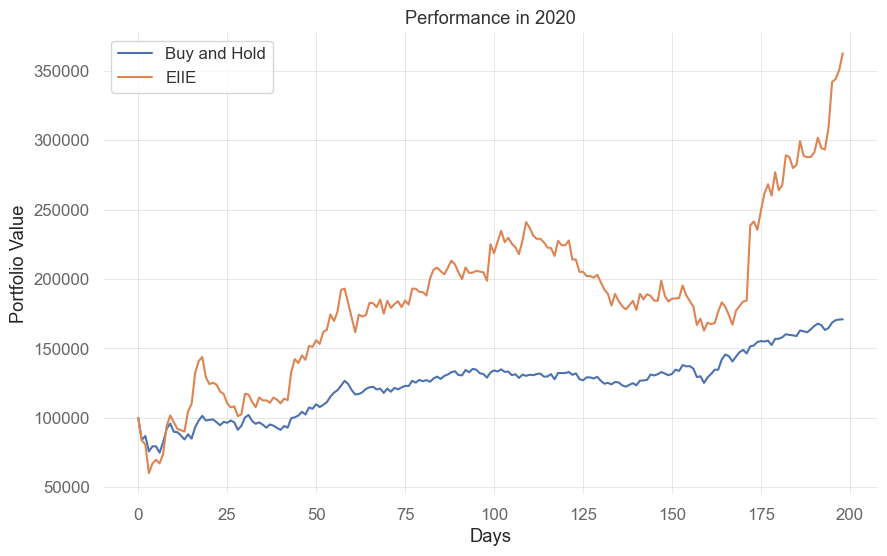

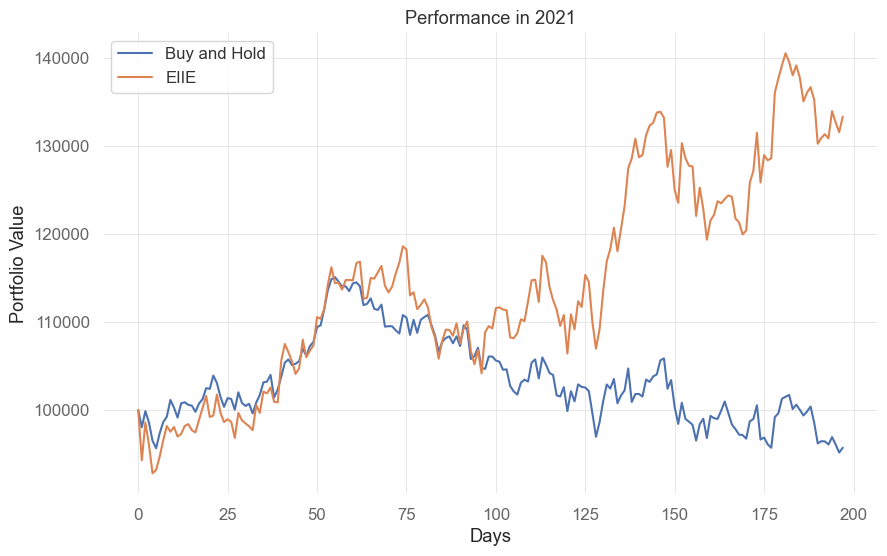

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline 


plt.plot(UBAH_results["2020"]["value"], label="Buy and Hold")
plt.plot(EIIE_results["2020"]["value"], label="EIIE")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in 2020")
plt.legend()

plt.show()



plt.plot(UBAH_results["2021"]["value"], label="Buy and Hold")
plt.plot(EIIE_results["2021"]["value"], label="EIIE")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in 2021")
plt.legend()

plt.show()

We can see that the agent is able to learn a good policy but its performance is worse the more the test period advances into the future. To get a better performance in 2022, for example, the agent should probably be trained again using more recent data.

TODO: https://github.com/AI4Finance-Foundation/FinRL/blob/master/examples/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb